In [1]:
from keras import Model
from keras.layers import *

In [2]:
# Loading the dataset - Binary Classification
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame = True)
pd.concat([data["data"], data["target"]], axis=1).head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [5]:
# The first output is regression which predict the mean area and the second output is classification which predicts the target
import pandas as pd
X = data["data"].drop(columns="mean area")
y = pd.concat((data["data"].loc[:, "mean area"], data["target"]), axis=1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_reg = y_train["mean area"]
y_train_clf = y_train["target"]
y_test_reg = y_test["mean area"]
y_test_clf = y_test["target"]

In [11]:
input_ = Input(shape=(X_train.shape[1],), batch_size=32)
normalized = Normalization()(input_)

hidden_1 = Dense(units=30, activation='relu', kernel_initializer='he_normal')(normalized)
hidden_2 = Dense(units=15, activation='relu', kernel_initializer='he_normal')(hidden_1)

output_reg = Dense(units=1, activation='linear')(hidden_2)
output_clf = Dense(units=1, activation='sigmoid')(hidden_2)

model = Model(inputs=[input_], outputs=[output_reg, output_clf])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (32, 29)          │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (32, 29)          │         59 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (32, 30)          │        900 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (32, 15)          │        465 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (32, 1)           │         16 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (32, 1)           │         16 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,456 (5.69 KB)

 Trainable params: 1,397 (5.46 KB)

 Non-trainable params: 59 (240.00 B)

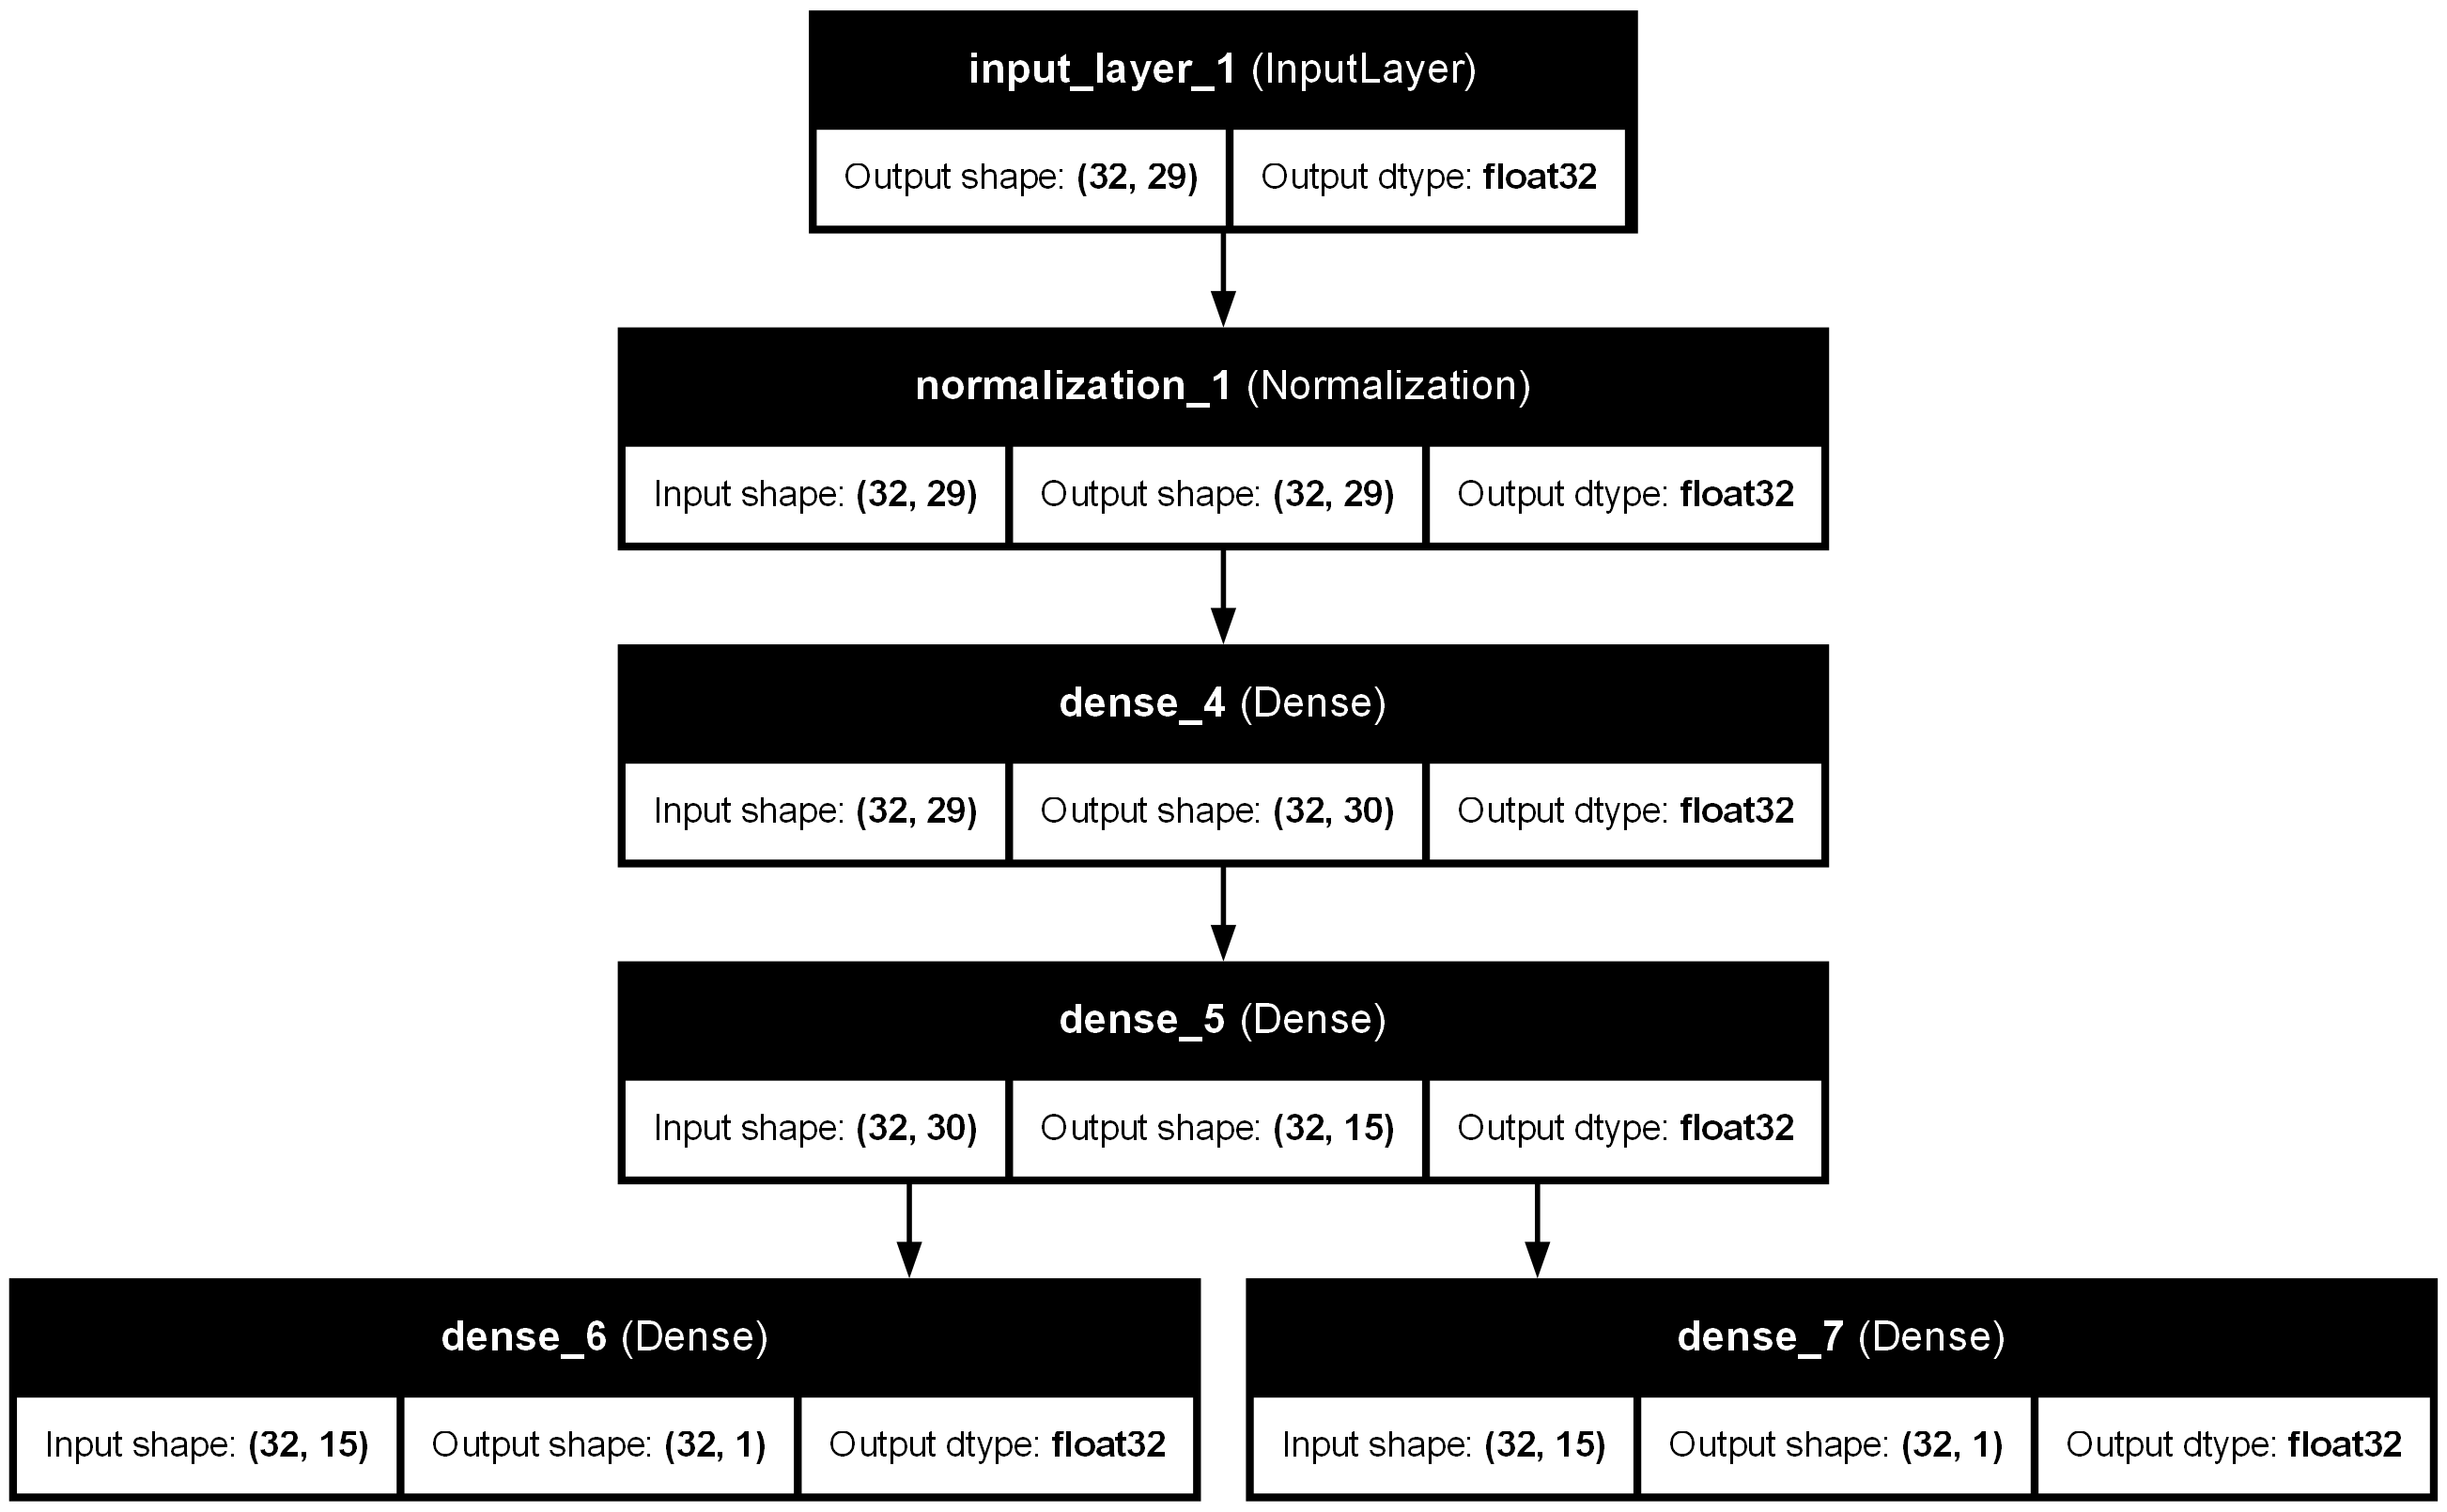

In [12]:
from keras.utils import plot_model
plot_model(model=model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [14]:
model.compile(optimizer="adam", loss=["mse", "binary_crossentropy"], metrics=["r2_score", "accuracy"])
history = model.fit(x=[X_train], y=[y_train_reg, y_train_clf], batch_size=True, epochs=15, validation_data=([X_test], [y_test_reg, y_test_clf]), verbose=1)

Epoch 1/15


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - dense_6_loss: 497926.7500 - dense_6_r2_score: -2.9610 - dense_7_accuracy: 0.5868 - dense_7_loss: 50.6041 - loss: 497977.2188 - val_dense_6_loss: 27003.4434 - val_dense_6_r2_score: 0.7658 - val_dense_7_accuracy: 0.4298 - val_dense_7_loss: 1.8731 - val_loss: 27005.3203
Epoch 2/15
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_6_loss: 12341.0400 - dense_6_r2_score: 0.9018 - dense_7_accuracy: 0.5670 - dense_7_loss: 1.5436 - loss: 12342.5762 - val_dense_6_loss: 11015.0918 - val_dense_6_r2_score: 0.9045 - val_dense_7_accuracy: 0.5877 - val_dense_7_loss: 2.1687 - val_loss: 11017.2607
Epoch 3/15
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_6_loss: 10515.7295 - dense_6_r2_score: 0.9163 - dense_7_accuracy: 0.4835 - dense_7_loss: 1.6352 - loss: 10517.3574 - val_dense_6_loss: 12068.2939 - val_dense_6_r2_score: 0.8953 - val_dense_7_accuracy: 0.3947 - val_dense_7_loss: 2.4993 - val_loss: 12070.7930
Epoch 4/15
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

*The `loss` and `val_loss` is the sum of losses of regression and classification respective to training and validation*